# Pre-processing Job Description 

For our models, we have focused on a job description for a Data Analyst role. 
Source: 
- https://careers.getyourguide.com/positions/engineering/data-analyst-business-analytics/berlin/

In this notebook, we will explore extracting key words from the job description that we can use to map with CVs. 

In the end of this notebook, I have added two "bonus" things- just two of the many more stuff I tried. These are not part of the project as the codes are entirely copied, I just wanted to learn from them and see what will be the results and how different with the one I did :) 

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.text import Text
import docx2txt

In [3]:
import os
import re
from nltk.tokenize import word_tokenize
import gensim
from gensim.models.phrases import Phraser, Phrases

In [26]:
#loading the job description
jd_da=docx2txt.process("Data Analyst_JD.docx")

In [27]:
jd_da

'As a Data Analyst, you will help drive measurement, strategy, and tactical decision-making within GetYourGuide. You will solve problems that could range from forecasting the ticket sales of our some of our key attractions, analyzing the success of our new product features, help develop strategies to improve customer service experience, or help our sales team decide which tours to acquire.\n\n\n\nResponsibilities:\n\n\n\nDevelop quantitative analysis to drive business & product decisions\n\nExplore large datasets, give meaning to data and numbers, identify opportunities and issues, and present findings to stakeholders\n\nDeliver analysis, insights, and recommendations to business teams to make impactful decisions\n\nDesign and implement metrics, dashboards, and reports\n\nServe as a liaison between the business teams and the data engineering team \n\nRequirements: \n\n\n\n2-3 years of relevant experience interpreting data in an analytics, data science or business intelligence role\n\nS

# Pre-processing text data

* Tokenising the document
* Removing punctuation
* Converting to lowercase
* Removing stop words
* Lemmatising the tokens

In [28]:
#remove punctuation+ lowercase
jd_da = nltk.word_tokenize(jd_da)
jd_da=[word.lower() for word in jd_da if word.isalpha()]
print(jd_da)

['as', 'a', 'data', 'analyst', 'you', 'will', 'help', 'drive', 'measurement', 'strategy', 'and', 'tactical', 'within', 'getyourguide', 'you', 'will', 'solve', 'problems', 'that', 'could', 'range', 'from', 'forecasting', 'the', 'ticket', 'sales', 'of', 'our', 'some', 'of', 'our', 'key', 'attractions', 'analyzing', 'the', 'success', 'of', 'our', 'new', 'product', 'features', 'help', 'develop', 'strategies', 'to', 'improve', 'customer', 'service', 'experience', 'or', 'help', 'our', 'sales', 'team', 'decide', 'which', 'tours', 'to', 'acquire', 'responsibilities', 'develop', 'quantitative', 'analysis', 'to', 'drive', 'business', 'product', 'decisions', 'explore', 'large', 'datasets', 'give', 'meaning', 'to', 'data', 'and', 'numbers', 'identify', 'opportunities', 'and', 'issues', 'and', 'present', 'findings', 'to', 'stakeholders', 'deliver', 'analysis', 'insights', 'and', 'recommendations', 'to', 'business', 'teams', 'to', 'make', 'impactful', 'decisions', 'design', 'and', 'implement', 'metr

In [29]:
# filter stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

jd_da = [token for token in jd_da if token not in stop_words]
print(jd_da)

['data', 'analyst', 'help', 'drive', 'measurement', 'strategy', 'tactical', 'within', 'getyourguide', 'solve', 'problems', 'could', 'range', 'forecasting', 'ticket', 'sales', 'key', 'attractions', 'analyzing', 'success', 'new', 'product', 'features', 'help', 'develop', 'strategies', 'improve', 'customer', 'service', 'experience', 'help', 'sales', 'team', 'decide', 'tours', 'acquire', 'responsibilities', 'develop', 'quantitative', 'analysis', 'drive', 'business', 'product', 'decisions', 'explore', 'large', 'datasets', 'give', 'meaning', 'data', 'numbers', 'identify', 'opportunities', 'issues', 'present', 'findings', 'stakeholders', 'deliver', 'analysis', 'insights', 'recommendations', 'business', 'teams', 'make', 'impactful', 'decisions', 'design', 'implement', 'metrics', 'dashboards', 'reports', 'serve', 'liaison', 'business', 'teams', 'data', 'engineering', 'team', 'requirements', 'years', 'relevant', 'experience', 'interpreting', 'data', 'analytics', 'data', 'science', 'business', 'i

In [30]:
# Lemmatise document from filtered tokens
lemmatizer = nltk.WordNetLemmatizer()
jd_da = [lemmatizer.lemmatize(i) for i in jd_da]
print(jd_da)

['data', 'analyst', 'help', 'drive', 'measurement', 'strategy', 'tactical', 'within', 'getyourguide', 'solve', 'problem', 'could', 'range', 'forecasting', 'ticket', 'sale', 'key', 'attraction', 'analyzing', 'success', 'new', 'product', 'feature', 'help', 'develop', 'strategy', 'improve', 'customer', 'service', 'experience', 'help', 'sale', 'team', 'decide', 'tour', 'acquire', 'responsibility', 'develop', 'quantitative', 'analysis', 'drive', 'business', 'product', 'decision', 'explore', 'large', 'datasets', 'give', 'meaning', 'data', 'number', 'identify', 'opportunity', 'issue', 'present', 'finding', 'stakeholder', 'deliver', 'analysis', 'insight', 'recommendation', 'business', 'team', 'make', 'impactful', 'decision', 'design', 'implement', 'metric', 'dashboard', 'report', 'serve', 'liaison', 'business', 'team', 'data', 'engineering', 'team', 'requirement', 'year', 'relevant', 'experience', 'interpreting', 'data', 'analytics', 'data', 'science', 'business', 'intelligence', 'role', 'stro

In [31]:
#just checking most common words
from nltk.probability import FreqDist

file=FreqDist(jd_da)
file.most_common(50)

#we will do visualisation in the below function

[('data', 7),
 ('business', 6),
 ('experience', 5),
 ('team', 4),
 ('help', 3),
 ('drive', 2),
 ('strategy', 2),
 ('problem', 2),
 ('sale', 2),
 ('product', 2),
 ('develop', 2),
 ('analysis', 2),
 ('decision', 2),
 ('meaning', 2),
 ('number', 2),
 ('tool', 2),
 ('skill', 2),
 ('ability', 2),
 ('understand', 2),
 ('plus', 2),
 ('analyst', 1),
 ('measurement', 1),
 ('tactical', 1),
 ('within', 1),
 ('getyourguide', 1),
 ('solve', 1),
 ('could', 1),
 ('range', 1),
 ('forecasting', 1),
 ('ticket', 1),
 ('key', 1),
 ('attraction', 1),
 ('analyzing', 1),
 ('success', 1),
 ('new', 1),
 ('feature', 1),
 ('improve', 1),
 ('customer', 1),
 ('service', 1),
 ('decide', 1),
 ('tour', 1),
 ('acquire', 1),
 ('responsibility', 1),
 ('quantitative', 1),
 ('explore', 1),
 ('large', 1),
 ('datasets', 1),
 ('give', 1),
 ('identify', 1),
 ('opportunity', 1)]

# Method #1: Topic modelling with LDA

"Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents."

Sources: 
- https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24#:~:text=Topic%20modeling%20is%20a%20type,document%20to%20a%20particular%20topic.
- https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

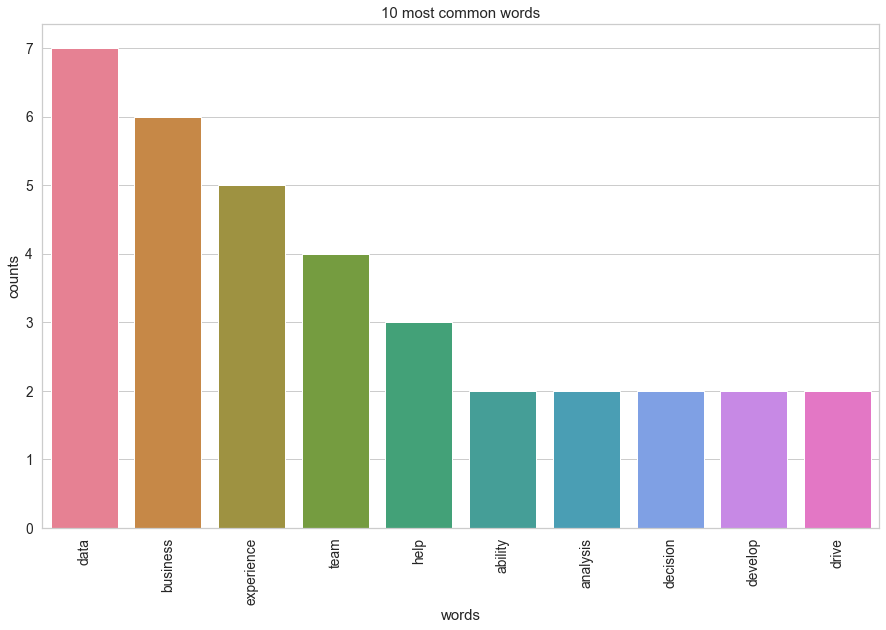

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

#function

def top_10_keywords(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='top 10 keywords')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('keywords')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(jd_da)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [38]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics via LDA:

Topic #0:
experience ability skill acquire user metric forecasting notebook solving engineering

Topic #1:
product analysis feature hive spark strong analytics decide big engaged

Topic #2:
data sale deliver identify present tour ticket highly looker key

Topic #3:
plus finding knowledge measurement dashboard minimal relevant international interpreting issue

Topic #4:
business help problem intelligence package engaged requirement make implement engineering

Topic #5:
meaning science insight report quantitative communication great environment explore direction

Topic #6:
develop year range statistical getyourguide opportunity demonstrated tactical company new

Topic #7:
decision large success improve individual proven python responsibility serve solve

Topic #8:
drive tool strategy tech reasoning curiosity work evidence jupyter behavior

Topic #9:
team understand number reporting design role recommendation sql customer nice


<b>Conclusion: </b>: We won't be able to use this model to evaluate the requirements, too vague.. Also, every time you run the model-> the outcome is different. 

# Method #2: RAKE (Rapid Automatic Keyword Extraction)

"Rapid Automatic Keyword Extraction is a keyword extraction algorithm that is extremely efficient which operates on individual documents to enable an application to the dynamic collection"

Source:
- https://medium.com/datadriveninvestor/rake-rapid-automatic-keyword-extraction-algorithm-f4ec17b2886c

In [45]:
from rake_nltk import Rake
from collections import Counter
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.text import Text
import docx2txt

In [47]:
#loading data analyst role- unprocessed
text=docx2txt.process("/Users/riyavasileva/Ironhack/Final Project/Data Analyst_JD.docx")

In [48]:
r = Rake()
r.extract_keywords_from_text(text)
phrases = r.get_ranked_phrases_with_scores()

In [50]:
summary = pd.DataFrame(phrases,columns=['score','Phrase'])
summary = summary.sort_values('score',ascending=False)
summary.head(20)

,score,Phrase
0,46.500000,highly engaged individuals great communication...
1,23.500000,product decisions explore large datasets
2,22.400000,business intelligence role strong knowledge
3,16.500000,make impactful decisions design
4,14.750000,improve customer service experience
5,14.071429,data engineering team requirements
6,13.321429,relevant experience interpreting data
7,10.000000,new product features
11,9.000000,making within getyourguide
12,9.000000,develop quantitative analysis


# Method #3: Using Gensim library

In [40]:
from gensim.summarization import keywords
import warnings
warnings.filterwarnings("ignore")

In [74]:
values = keywords(text=text,split='\n',scores=True)

In [75]:
data = pd.DataFrame(values,columns=['keyword','score'])
data = data.sort_values('score',ascending=False)
data.head(10)

,keyword,score
0,data,0.311103
1,decision,0.255610
2,decisions,0.255610
3,experience,0.221352
4,team,0.195705
5,teams,0.195705
6,business,0.174313
7,product,0.151129
8,develop,0.148329
9,skills,0.138911


None of the technique was focusing on skills.... SO I looked at CSO-classifier, and spent hours trying to download it.. without any success though. You can see the final view of job skills matching in the notebook "SkillsMarching_CVs"
Source: https://github.com/angelosalatino/cso-classifier

# Conclusion

# Bonus: TF-IDF

I was just curious to try it out, the code is copied from here: https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.X9qdyOlKi3I

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
import re

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords=get_stop_words("stopwords.txt")

#create a vocabulary of words, 
#ignore words that appear in 85% of documents and eliminate stop words
cv=CountVectorizer(max_df=0.85,stop_words=stopwords)
word_count_vector=cv.fit_transform(jd_da)

In [82]:
word_count_vector.shape

(149, 109)

In [83]:
list(cv.vocabulary_.keys())[:10]

['data',
 'analyst',
 'help',
 'drive',
 'measurement',
 'strategy',
 'tactical',
 'getyourguide',
 'solve',
 'problem']

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [85]:
tfidf_transformer.idf_

array([4.91202301, 5.31748811, 4.91202301, 5.31748811, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 4.06472515,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       3.93119375, 5.31748811, 5.31748811, 4.91202301, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 4.91202301, 5.31748811,
       4.91202301, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       4.21887582, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 4.62434093,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 4.91202301, 5.31748811,
       5.31748811, 5.31748811, 5.31748811, 5.31748811, 5.31748811,
       4.91202301, 5.31748811, 5.31748811, 4.91202301, 5.31748811,
       4.91202301, 4.91202301, 5.31748811, 5.31748811, 5.31748

In [86]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [91]:
# you only needs to do this once
feature_names=cv.get_feature_names()

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(jd_da))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

In [92]:
# now print the results
print("\n=====Body=====")
print(jd_da)
print("\n===Keywords===")
for k in keywords:
    print(k,keywords[k])


=====Body=====
['data', 'analyst', 'help', 'drive', 'measurement', 'strategy', 'tactical', 'within', 'getyourguide', 'solve', 'problem', 'could', 'range', 'forecasting', 'ticket', 'sale', 'key', 'attraction', 'analyzing', 'success', 'new', 'product', 'feature', 'help', 'develop', 'strategy', 'improve', 'customer', 'service', 'experience', 'help', 'sale', 'team', 'decide', 'tour', 'acquire', 'responsibility', 'develop', 'quantitative', 'analysis', 'drive', 'business', 'product', 'decision', 'explore', 'large', 'datasets', 'give', 'meaning', 'data', 'number', 'identify', 'opportunity', 'issue', 'present', 'finding', 'stakeholder', 'deliver', 'analysis', 'insight', 'recommendation', 'business', 'team', 'make', 'impactful', 'decision', 'design', 'implement', 'metric', 'dashboard', 'report', 'serve', 'liaison', 'business', 'team', 'data', 'engineering', 'team', 'requirement', 'year', 'relevant', 'experience', 'interpreting', 'data', 'analytics', 'data', 'science', 'business', 'intelligence

# Bonus 2: Someone has already done what I spent 10 days to do semi-manually.. 

Source: https://chatbotslife.com/ranking-resumes-for-a-given-job-description-using-natural-language-processing-a-toy-project-1f49d3156b44

In [126]:
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [130]:
#Function to read resumes from the folder one by one
mypath='/Users/riyavasileva/Ironhack/Final Project/Resumes1' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

#function to read resume ends

In [131]:
#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('DA_skills.csv')
    da_words = [nlp(text) for text in keyword_dict['Data Analytics'].dropna(axis = 0)]
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    bigdata_words = [nlp(text) for text in keyword_dict['Big Data'].dropna(axis = 0)]
    dataviz_words = [nlp(text) for text in keyword_dict['Data Visualization'].dropna(axis = 0)]
    tools_words = [nlp(text) for text in keyword_dict['Data Tools'].dropna(axis = 0)]
    problemsolving_words = [nlp(text) for text in keyword_dict['Problem Solving'].dropna(axis = 0)]
    customer_words = [nlp(text) for text in keyword_dict['Customer Centricity'].dropna(axis = 0)]
    adaptability_words = [nlp(text) for text in keyword_dict['Adaptability'].dropna(axis = 0)]
    communication_words = [nlp(text) for text in keyword_dict['Communication Skills'].dropna(axis = 0)]

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Data Analytics', None, *da_words)
    matcher.add('Statistics', None, *stats_words)
    matcher.add('Big Data', None, *bigdata_words)
    matcher.add('Data Visualization', None, *dataviz_words)
    matcher.add('Data Tools', None, *tools_words)
    matcher.add('Problem Solving', None, *problemsolving_words)
    matcher.add('Customer Centricity', None, *customer_words)
    matcher.add('Adaptability', None, *adaptability_words)
    matcher.add('Communication Skills', None, *communication_words)
    doc = nlp(text)
    
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)
        
#function ends

In [ ]:
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

In [108]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']

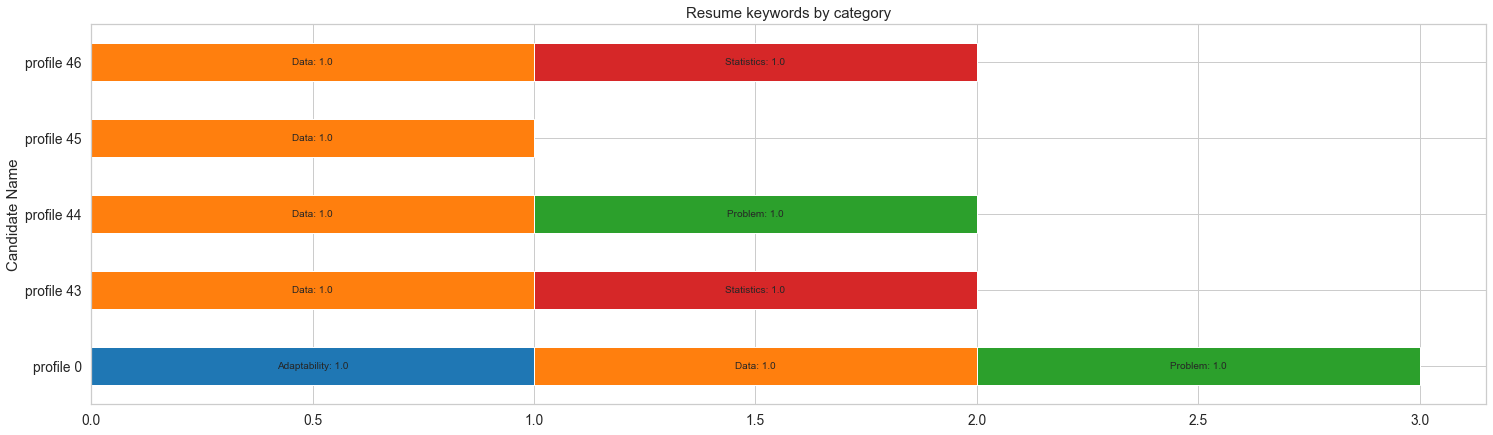

In [109]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(25,7), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()